<a href="https://colab.research.google.com/github/Zasegor/machine-learning-project/blob/main/basic_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты

In [58]:
import numpy as np
from numpy.linalg import LinAlgError
from typing import Optional, Union, Dict, List, Tuple, Literal
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

# Встроенные модели

## **0. Линейная регрессия**

---
### **Когда использовать?**  
Когда целевая переменная (зависимая переменная) — **непрерывная** (например, цена дома, температура, зарплата).  

---
### **Что важно?**  
- `model.coef_` — веса признаков (в простом случае — наклон прямой).  
- `model.intercept_` — свободный член (сдвиг по оси Y).  
- **Метрики**:  
  - `mean_squared_error` (MSE) — средняя квадратичная ошибка (чем меньше, тем лучше).  
  - `r2_score` (R²) — коэффициент детерминации (1 — идеальное предсказание, 0 — как среднее).  


In [73]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

---

In [74]:
# Генерация данных R->R
X, y = make_regression(
    n_samples=500,
    n_features=1,
    n_informative=1,
    noise=10,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = go.Figure()

fig.add_scatter(
    x=X_train.reshape(-1),
    y=y_train,
    mode='markers',
    marker=dict(color='red'),
    name="Тренировочный набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_test,
    mode='markers',
    marker=dict(color='gray'),
    name="Тестовый набор"
)

fig.update_layout(
    title="Линейная регрессия R->R",
    showlegend=True
)

In [75]:
model = LinReg()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_pred=y_pred, y_true=y_test)
R2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"MSE = {MSE}, R^2 = {R2}")

fig.add_scatter(
    x=X_train.reshape(-1),
    y=model.predict(X_train),
    mode='lines',
    line=dict(color='blue'),
    name="Предсказанный (тренировочный) набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_pred,
    mode='lines',
    line=dict(color='blue'),
    name="Предсказанный (тестовый) набор"
)

MSE = 101.0077156966921, R^2 = 0.9726379442654388


In [76]:
# Генерация данных R^n->R
X, y = make_regression(
    n_samples=500,
    n_features=10,
    n_informative=7,
    noise=10,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinReg()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_pred=y_pred, y_true=y_test)
R2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"MSE = {MSE}, R^2 = {R2}")

MSE = 110.55332562120294, R^2 = 0.9907627157210539


### Использование полиномиальных фич для нелинейной зависимости

In [77]:
X = np.linspace(-5, 5, 200)
y = np.sin(X) + np.random.normal(-0.1, 0.1, 200)
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = go.Figure()

fig.add_scatter(
    x=X_train.reshape(-1),
    y=y_train,
    mode='markers',
    marker=dict(color='red'),
    name="Тренировочный набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_test,
    mode='markers',
    marker=dict(color='gray'),
    name="Тестовый набор"
)

fig.update_layout(
    title="Линейная регрессия R->R",
    showlegend=True
)

In [78]:
model_lin = LinReg()

model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)

MSE_lin = mean_squared_error(y_pred=y_pred_lin, y_true=y_test)
R2_lin = r2_score(y_pred=y_pred_lin, y_true=y_test)
print(f"MSE = {MSE_lin}, R^2 = {R2_lin}")

fig.add_scatter(
    x=X.reshape(-1),
    y=model_lin.predict(X),
    mode='lines',
    line=dict(color='blue'),
    name="Предсказанный набор (без PolynomialFeatures)"
)

MSE = 0.6371331113991132, R^2 = -0.023726382638757038


In [79]:
poly = PolynomialFeatures(degree=6)

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

model_poly = LinReg()

model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

MSE_poly = mean_squared_error(y_pred=y_pred_poly, y_true=y_test)
R2_poly = r2_score(y_pred=y_pred_poly, y_true=y_test)
print(f"MSE = {MSE_poly}, R^2 = {R2_poly}")

fig.add_scatter(
    x=X.reshape(-1),
    y=model_poly.predict(X_poly),
    mode='lines',
    line=dict(color='green'),
    name="Предсказанный набор (с PolynomialFeatures)"
)

MSE = 0.017322807833856892, R^2 = 0.9721662316969243


---


## **1. Логистическая регрессия**  

---
### **Когда использовать?**  
Когда целевая переменная — **категориальная** (бинарная: 0/1, Да/Нет; или мультиклассовая: "кошка", "собака", "птица").  

---
### **Что важно?**  
- `predict_proba()` — возвращает вероятности классов (полезно для оценки уверенности модели).  
- **Метрики**:  
  - `accuracy_score` — доля правильных ответов.  
  - `confusion_matrix` — матрица ошибок (TN, FP, FN, TP).  
  - `classification_report` — precision, recall, F1-score.  

---
### **Плюсы и минусы**  

#### ✅ **Плюсы:**  
1. Простота и интерпретируемость
2. Быстрое обучение и предсказание  
3. Эффективна на малых данных
4. Поддержка регуляризации (L1/L2)  
5. Выход — вероятность класса

#### ❌ **Минусы:**  
1. Линейные границы решений
2. Чувствительность к выбросам
3. Проблемы с несбалансированными классами
4. Предполагает линейную зависимость log-odds от признаков
5. Не подходит для сложных нелинейных данных

In [80]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

---

#### **Граничная функция y=x**

In [81]:
func = np.linspace(-5, 5, 500)
X = np.array([func, func + np.random.normal(-2, 2, 500)]).T
y = np.array([1 if x[1] < x[0] else 0 for x in X])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = go.Figure()

fig.add_scatter(
    x=X[:, 0][y==0],
    y=X[:, 1][y==0],
    mode='markers',
    marker=dict(color='red', size=9),
    name="Класс '0'"
)

fig.add_scatter(
    x=X[:, 0][y==1],
    y=X[:, 1][y==1],
    mode='markers',
    marker=dict(color='blue', size=9),
    name="Класс '1'"
)

fig.update_layout(
    title="Логистическая регрессия",
    showlegend=True
)

In [82]:
model = LogReg()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"accuracy_score: {accuracy}\nconfusion_matrix:\n{conf_matrix}\nclassification_report:\n{report}")

fig.add_scatter(
    x=X[:, 0][model.predict(X)==0],
    y=X[:, 1][model.predict(X)==0],
    mode='markers',
    marker=dict(color='green', size=7),
    name="Класс '0' (предсказанный)"
)

fig.add_scatter(
    x=X[:, 0][model.predict(X)==1],
    y=X[:, 1][model.predict(X)==1],
    mode='markers',
    marker=dict(color='gray', size=7),
    name="Класс '1' (предсказанный)"
)

accuracy_score: 1.0
confusion_matrix:
[[ 31   0]
 [  0 119]]
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00       119

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



#### **Граничная фукнция y=Sin(x)**

In [83]:
# генерация данных для классификации
func = np.linspace(-5, 5, 500)
X = np.array([func, np.sin(func) + np.random.normal(-2, 2, 500)]).T
y = np.array([1 if x[1] < np.sin(x[0]) else 0 for x in X])

fig = go.Figure()

fig.add_scatter(
    x=X[:, 0][y==0],
    y=X[:, 1][y==0],
    mode='markers',
    marker=dict(color='red', size=9),
    name="Класс '0'"
)

fig.add_scatter(
    x=X[:, 0][y==1],
    y=X[:, 1][y==1],
    mode='markers',
    marker=dict(color='blue', size=9),
    name="Класс '1'"
)

fig.update_layout(
    title="Логистическая регрессия",
    showlegend=True
)

In [84]:
poly = PolynomialFeatures(degree=6)

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

model = LogReg()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"accuracy_score: {accuracy}\nconfusion_matrix:\n{conf_matrix}\nclassification_report:\n{report}")

fig.add_scatter(
    x=X[:, 0][model.predict(X_poly)==0],
    y=X[:, 1][model.predict(X_poly)==0],
    mode='markers',
    marker=dict(color='green', size=7),
    name="Класс '0' (предсказанный)"
)

fig.add_scatter(
    x=X[:, 0][model.predict(X_poly)==1],
    y=X[:, 1][model.predict(X_poly)==1],
    mode='markers',
    marker=dict(color='gray', size=7),
    name="Класс '1' (предсказанный)"
)

accuracy_score: 0.9733333333333334
confusion_matrix:
[[ 17   0]
 [  4 129]]
classification_report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       1.00      0.97      0.98       133

    accuracy                           0.97       150
   macro avg       0.90      0.98      0.94       150
weighted avg       0.98      0.97      0.97       150



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



---

## **2. K-ближайших соседей (KNN)**  

---
### **Когда использовать?**  
- Для **классификации** (бинарной или многоклассовой).
- Когда данные имеют **локальную структуру** (близкие объекты похожи).  

---
### **Что важно?**  
- `n_neighbors` – количество соседей (`k`). Чем меньше `k`, тем сложнее модель (риск переобучения).  
- `weights` – взвешивание соседей (`uniform` – все равны, `distance` – ближе = важнее).  
- `metric` – метрика расстояния (`euclidean`, `manhattan`, `minkowski`).  

**Метрики** (аналогично логистической регрессии):  
- `accuracy_score` – общая точность.  
- `confusion_matrix` – матрица ошибок.  
- `classification_report` – precision, recall, F1.  

---
### **Плюсы и минусы**  
✅ **Плюсы**:  
- Простота интерпретации.  
- Не требует обучения (ленивый алгоритм).  
- Хорошо работает на небольших данных с явной локальной структурой.  

❌ **Минусы**:  
- Медленный на больших данных (нужно хранить весь датасет).  
- Чувствителен к шумам и выбросам.  
- Требует подбора `k` и метрики расстояния.  

In [85]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.datasets import load_digits

---

In [86]:
digits = load_digits()
X = [matrix.flatten().tolist() for matrix in digits.images]
y = digits.target

fig = sp.make_subplots(rows=6, cols=6, horizontal_spacing=0.01, vertical_spacing=0.01)

for i in range(36):
    row = i // 6 + 1
    col = i % 6 + 1

    fig.add_trace(
        go.Heatmap(
            z=digits.images[i][::-1,:],
            colorscale='gray',
            showscale=False,
            hoverinfo='z'
        ),
        row=row, col=col
    )

    fig.add_annotation(
        x=0, y=7,
        text=str(y[i]),
        showarrow=False,
        font=dict(color='red', size=12),
        xref='x', yref='y',
        xanchor='center', yanchor='middle',
        row=row, col=col
    )

fig.update_layout(
    title='Первые 36 цифр датасета (6x6)',
    width=800,
    height=800,
    margin=dict(l=20, r=20, b=20, t=40),
    plot_bgcolor='white',
    showlegend=False
)

for i in range(1, 37):
    fig.update_xaxes(showticklabels=False, row=(i-1)//6+1, col=(i-1)%6+1)
    fig.update_yaxes(showticklabels=False, row=(i-1)//6+1, col=(i-1)%6+1)

fig.show()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = KNN(n_neighbors=3)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.987037037037037


In [88]:
for i in range(36):
    row = i // 6 + 1
    col = i % 6 + 1

    fig.add_annotation(
        x=1, y=7,
        text=str(model.predict(X[:36])[i]),
        showarrow=False,
        font=dict(color='blue', size=12),
        xref='x', yref='y',
        xanchor='center', yanchor='middle',
        row=row, col=col
    )

fig.show()

---

## **3. Наивный Байесовский классификатор (Naive Bayes)**  
---
### **Когда использовать?**  
- Для **классификации текстов** (спам/не спам, категоризация документов).  
- Когда нужна **быстрая работа** на больших данных.  
- Если признаки **условно независимы** (наивное предположение).  
- Для задач с **высокой размерностью** (много признаков).  

---
### **Что важно?**  
#### **Основные варианты в sklearn:**  
1. **GaussianNB**  
   - Для непрерывных данных (предполагает нормальное распределение).  
   ```python
   from sklearn.naive_bayes import GaussianNB
   model = GaussianNB()
   ```

2. **MultinomialNB**  
   - Для дискретных данных (частоты слов, категории).  
   ```python
   from sklearn.naive_bayes import MultinomialNB
   model = MultinomialNB(alpha=1.0)  # alpha - параметр сглаживания
   ```

3. **BernoulliNB**  
   - Для бинарных признаков (есть/нет слова в тексте).  
   ```python
   from sklearn.naive_bayes import BernoulliNB
   model = BernoulliNB(binarize=0.5)
   ```

#### **Ключевые параметры:**  
- `alpha` – параметр сглаживания (защита от нулевых вероятностей).  
- `fit_prior` – учитывать ли априорные вероятности классов.  

#### **Метрики:**  
- `accuracy_score` – общая точность.  
- `precision_recall_fscore_support` – для несбалансированных данных.  

---
## **Плюсы и минусы**  
✅ **Плюсы:**  
- Крайне **быстрое обучение** и предсказание.  
- Хорошо работает с **высокомерными данными** (например, тексты).  
- **Мало параметров** для настройки.  
- Устойчив к **нерелевантным признакам**.  

❌ **Минусы:**  
- Наивное предположение о **независимости признаков** (редко выполняется).  
- Плохо обрабатывает **зависимости между признаками**.  
- Для GaussianNB важно **нормальное распределение** данных.  


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris

---

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

fig = go.Figure()

fig.add_scatter3d(
    x=X[:,0][y==0],
    y=X[:,1][y==0],
    z=X[:,2][y==0],
    mode='markers',
    marker=dict(color='red'),
    name="Класс 0"
)

fig.add_scatter3d(
    x=X[:,0][y==1],
    y=X[:,1][y==1],
    z=X[:,2][y==1],
    mode='markers',
    marker=dict(color='gray'),
    name="Класс 1"
)

fig.add_scatter3d(
    x=X[:,0][y==2],
    y=X[:,1][y==2],
    z=X[:,2][y==2],
    mode='markers',
    marker=dict(color='blue'),
    name="Класс 2"
)

fig.update_layout(
    title="Iris датасет",
    showlegend=True
)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Точность:", accuracy_score(y_test, y_pred))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))

Точность: 0.9736842105263158

Матрица ошибок:
[[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]

Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.94      1.00      0.97        17
           2       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
fig.add_scatter3d(
    x=X[:,0][model.predict(X)==0],
    y=X[:,1][model.predict(X)==0],
    z=X[:,2][model.predict(X)==0],
    mode='markers',
    marker=dict(color='lightblue', size=3),
    name="Предсказанный ласс 0"
)

fig.add_scatter3d(
    x=X[:,0][model.predict(X)==1],
    y=X[:,1][model.predict(X)==1],
    z=X[:,2][model.predict(X)==1],
    mode='markers',
    marker=dict(color='purple', size=3),
    name="Предсказанный класс 1"
)

fig.add_scatter3d(
    x=X[:,0][model.predict(X)==2],
    y=X[:,1][model.predict(X)==2],
    z=X[:,2][model.predict(X)==2],
    mode='markers',
    marker=dict(color='yellow', size=3),
    name="Предсказанный класс 2"
)

---

## **4. Дерево решений (Decision Tree Classifier)**  
---
### **Когда использовать?**  
- Для **классификации** (бинарной или многоклассовой).  
- Когда важна **интерпретируемость** (можно визуализировать правила).  
- Если данные **нелинейны** или содержат сложные зависимости.

---
### **Что важно?**  
#### **Основные параметры:**  
- `max_depth` – максимальная глубина дерева (чем больше, тем сложнее модель).  
- `criterion` – критерий разделения:  
  - `'gini'` (индекс Джини) – по умолчанию.  
  - `'entropy'` – информационный выигрыш.  
- `min_samples_split` – минимальное число образцов для разделения узла (например, 5).  
- `min_samples_leaf` – минимальное число образцов в листе (например, 2).  

#### **Метрики (аналогично KNN и логистической регрессии):**  
- `accuracy_score` – общая точность.  
- `confusion_matrix` – матрица ошибок.  
- `classification_report` – precision, recall, F1.  

#### **Визуализация дерева:**  
```python
from sklearn.tree import plot_tree
plot_tree(model, filled=True, feature_names=['Feature_1', 'Feature_2'])
```
- `filled=True` – раскрашивает узлы по классам.  
- `feature_names` – подписи признаков.  

---
## **Плюсы и минусы**  
✅ **Плюсы:**  
- Простота интерпретации (можно увидеть правила).  
- Работает с категориальными и числовыми данными без предобработки.  
- Не требует масштабирования признаков.  

❌ **Минусы:**  
- Склонен к переобучению (без ограничений глубины).  
- Нестабилен (малые изменения данных → другое дерево).  
- Плохо экстраполирует за пределы обучающих данных.  


In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris

---

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

fig = go.Figure()

fig.add_scatter3d(
    x=X[:,0][y==0],
    y=X[:,1][y==0],
    z=X[:,2][y==0],
    mode='markers',
    marker=dict(color='red'),
    name="Класс 0"
)

fig.add_scatter3d(
    x=X[:,0][y==1],
    y=X[:,1][y==1],
    z=X[:,2][y==1],
    mode='markers',
    marker=dict(color='gray'),
    name="Класс 1"
)

fig.add_scatter3d(
    x=X[:,0][y==2],
    y=X[:,1][y==2],
    z=X[:,2][y==2],
    mode='markers',
    marker=dict(color='blue'),
    name="Класс 2"
)

fig.update_layout(
    title="Iris датасет",
    showlegend=True
)

In [ ]:
model = Tree(max_depth=5)

model.fit(X_train, y_train)
y_pred = model.predict(X)

print(f"Accuracy: {model.score(X_test, y_test)}")

Accuracy: 0.9473684210526315


[Text(0.4, 0.9166666666666666, 'x[2] <= 2.7\ngini = 0.665\nsamples = 112\nvalue = [41, 37, 34]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.499\nsamples = 71\nvalue = [0, 37, 34]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'x[1] <= 2.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4, 0.25, 'x[0] <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 

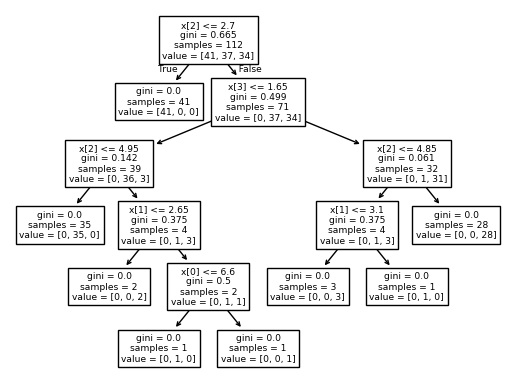

In [ ]:
plot_tree(model)

In [ ]:
fig.add_scatter3d(
    x=X[:,0][y_pred==0],
    y=X[:,1][y_pred==0],
    z=X[:,2][y_pred==0],
    mode='markers',
    marker=dict(color='lightblue', size=3),
    name="Предсказанный ласс 0"
)

fig.add_scatter3d(
    x=X[:,0][y_pred==1],
    y=X[:,1][y_pred==1],
    z=X[:,2][y_pred==1],
    mode='markers',
    marker=dict(color='purple', size=3),
    name="Предсказанный класс 1"
)

fig.add_scatter3d(
    x=X[:,0][y_pred==2],
    y=X[:,1][y_pred==2],
    z=X[:,2][y_pred==2],
    mode='markers',
    marker=dict(color='yellow', size=3),
    name="Предсказанный класс 2"
)

---

# Реализация приведенных моделей

## **1. Логистическая регрессия (+ линейная)**

In [90]:
class LinearRegression:
    def __init__(self, fit_intercept: bool = True,
                 penalty: Optional[Literal['l1', 'l2', 'elasticnet']] = None,
                 alpha: float = 1.0,
                 l1_ratio: float = 0.5,
                 solver: Literal['analytic', 'gd'] = 'analytic',
                 lr: float = 0.01,
                 max_iter: int = 1000,
                 tol: float = 1e-4):
        """
        Параметры:
        - fit_intercept: bool - добавлять ли intercept (смещение)
        - penalty: None, 'l1', 'l2', 'elasticnet' - тип регуляризации
        - alpha: float - коэффициент регуляризации
        - l1_ratio: float [0,1] - соотношение L1/L2 для elasticnet
        - solver: 'analytic' (только для L2/None) или 'gd' - метод решения
        - lr: float - скорость обучения (для градиентного спуска)
        - max_iter: int - макс. итераций (для градиентного спуска)
        - tol: float - критерий остановки (для градиентного спуска)
        """
        self.fit_intercept: bool = fit_intercept
        self.penalty: Optional[Literal['l1', 'l2', 'elasticnet']] = penalty
        self.alpha: float = alpha
        self.l1_ratio: float = l1_ratio
        self.solver: Literal['analytic', 'gd'] = solver
        self.lr: float = lr
        self.max_iter: int = max_iter
        self.tol: float = tol
        self.coef_: Optional[np.ndarray] = None
        self.intercept_: Optional[float] = None
        self.loss_history: list[float] = []

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Добавляет столбец единиц для intercept"""
        return np.c_[np.ones(X.shape[0]), X]

    def _soft_threshold(self, x: np.ndarray, threshold: float) -> np.ndarray:
        """Оператор soft-thresholding для L1-регуляризации"""
        return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Обучение модели"""
        if self.fit_intercept:
            X = self._add_intercept(X)

        if self.solver == 'analytic' and self.penalty in [None, 'l2']:
            self._fit_analytic(X, y)
        else:
            self._fit_iterative(X, y)

        if self.fit_intercept:
            self.intercept_ = self.coef_[0]
            self.coef_ = self.coef_[1:]
        else:
            self.intercept_ = 0

    def _fit_analytic(self, X: np.ndarray, y: np.ndarray) -> None:
        """Аналитическое решение (только для L2 или без регуляризации)"""
        try:
            if self.penalty == 'l2':
                identity = np.eye(X.shape[1])
                if self.fit_intercept:
                    identity[0, 0] = 0
                self.coef_ = np.linalg.inv(X.T @ X + self.alpha * identity) @ X.T @ y
            else:
                self.coef_ = np.linalg.pinv(X.T @ X) @ X.T @ y
        except np.linalg.LinAlgError:
            raise np.linalg.LinAlgError("Матрица сингулярна. Попробуйте solver='gd' или penalty='l2'")

    def _fit_iterative(self, X: np.ndarray, y: np.ndarray) -> None:
        """Итеративные методы (градиентный спуск) для всех типов регуляризации"""
        n_samples, n_features = X.shape
        self.coef_ = np.random.random(size=n_features)

        for i in range(self.max_iter):
            y_pred = X @ self.coef_
            error = y_pred - y
            grad = X.T @ error / n_samples

            if self.penalty == 'l1':
                self.coef_ = self._soft_threshold(
                    self.coef_ - self.lr * grad,
                    self.lr * self.alpha
                )
            elif self.penalty == 'l2':
                grad += (self.alpha / n_samples) * self.coef_
                if self.fit_intercept:
                    grad[0] = 0
                self.coef_ -= self.lr * grad
            elif self.penalty == 'elasticnet':
                l1_part = self.alpha * self.l1_ratio * np.sign(self.coef_)
                l2_part = self.alpha * (1 - self.l1_ratio) * self.coef_
                grad += (l1_part + l2_part) / n_samples
                if self.fit_intercept:
                    grad[0] = 0
                self.coef_ -= self.lr * grad
            else:
                self.coef_ -= self.lr * grad

            loss = np.mean(error ** 2)
            if self.penalty == 'l1':
                loss += self.alpha * np.sum(np.abs(self.coef_))
            elif self.penalty == 'l2':
                loss += (self.alpha / 2) * np.sum(self.coef_ ** 2)
            elif self.penalty == 'elasticnet':
                loss += self.alpha * (self.l1_ratio * np.sum(np.abs(self.coef_)) +
                                      (1 - self.l1_ratio) * np.sum(self.coef_ ** 2))

            self.loss_history.append(loss)

            if i > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказание"""
        if self.fit_intercept and self.intercept_ is not None:
            return X @ self.coef_ + self.intercept_
        return X @ self.coef_

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """R^2 score"""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

    def get_params(self) -> dict[str, Optional[np.ndarray | float | list[float]]]:
        """Возвращает параметры модели"""
        return {
            'coef': self.coef_,
            'intercept': self.intercept_,
            'loss_history': self.loss_history
        }


In [91]:
class LogisticRegression:
    def __init__(self, fit_intercept: bool = True,
                 penalty: Optional[Literal['l1', 'l2', 'elasticnet']] = None,
                 alpha: float = 1.0,
                 l1_ratio: float = 0.5,
                 lr: float = 0.001,
                 max_iter: int = 10000,
                 tol: float = 1e-7,
                 random_state: Optional[int] = None):
        """
        Параметры:
        - fit_intercept: bool - добавлять ли intercept (смещение)
        - penalty: None, 'l1', 'l2', 'elasticnet' - тип регуляризации
        - alpha: float - коэффициент регуляризации
        - l1_ratio: float [0,1] - соотношение L1/L2 для elasticnet
        - lr: float - скорость обучения
        - max_iter: int - максимальное количество итераций
        - tol: float - критерий остановки (разница потерь)
        - random_state: int - для воспроизводимости
        """
        self.fit_intercept: bool = fit_intercept
        self.penalty: Optional[Literal['l1', 'l2', 'elasticnet']] = penalty
        self.alpha: float = alpha
        self.l1_ratio: float = l1_ratio
        self.lr: float = lr
        self.max_iter: int = max_iter
        self.tol: float = tol
        self.random_state: Optional[int] = random_state
        self.coef_: Optional[np.ndarray] = None
        self.intercept_: Optional[float] = None
        self.classes_: Optional[np.ndarray] = None
        self.loss_history: list[float] = []

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        """Добавляет столбец единиц для intercept"""
        return np.c_[np.ones(X.shape[0]), X]

    def _sigmoid(self, z: np.ndarray) -> np.ndarray:
        """Сигмоидная функция"""
        return 1 / (1 + np.exp(-z))

    def _soft_threshold(self, x: np.ndarray, threshold: float) -> np.ndarray:
        """Soft-thresholding для L1-регуляризации"""
        return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LogisticRegression":
        """Обучение модели"""
        self.classes_ = np.unique(y)
        if len(self.classes_) != 2:
            raise ValueError("Только бинарная классификация поддерживается.")
        y = np.where(y == self.classes_[1], 1, 0)

        if self.fit_intercept:
            X = self._add_intercept(X)

        rng = np.random.RandomState(self.random_state)
        self.coef_ = rng.normal(scale=0.1, size=X.shape[1])

        for _ in range(self.max_iter):
            z = X @ self.coef_
            y_pred = self._sigmoid(z)
            grad = X.T @ (y_pred - y) / len(y)

            if self.penalty == 'l1':
                reg = self.alpha * np.sign(self.coef_)
                if self.fit_intercept:
                    reg[0] = 0
                self.coef_ = self._soft_threshold(self.coef_ - self.lr * grad, self.lr * reg)
            elif self.penalty == 'l2':
                reg = (self.alpha / len(y)) * self.coef_
                if self.fit_intercept:
                    reg[0] = 0
                self.coef_ -= self.lr * (grad + reg)
            elif self.penalty == 'elasticnet':
                l1_part = self.alpha * self.l1_ratio * np.sign(self.coef_)
                l2_part = self.alpha * (1 - self.l1_ratio) * self.coef_
                if self.fit_intercept:
                    l1_part[0] = l2_part[0] = 0
                self.coef_ -= self.lr * (grad + (l1_part + l2_part) / len(y))
            else:
                self.coef_ -= self.lr * grad

            loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                break

        if self.fit_intercept:
            self.intercept_ = self.coef_[0]
            self.coef_ = self.coef_[1:]
        else:
            self.intercept_ = 0

        return self

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Предсказание вероятностей классов"""
        if self.coef_ is None:
            raise Exception("Модель еще не обучена!")

        if self.fit_intercept:
            return self._sigmoid(X @ self.coef_ + self.intercept_)
        return self._sigmoid(X @ self.coef_)

    def predict(self, X: np.ndarray, threshold: float = 0.5) -> np.ndarray:
        """Предсказание классов"""
        proba = self.predict_proba(X)
        return np.where(proba >= threshold, self.classes_[1], self.classes_[0])

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Точность классификации"""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    def get_params(self) -> dict[str, Optional[int | float | Literal['l1', 'l2', 'elasticnet']]]:
        """Возвращает параметры модели"""
        return {
            'fit_intercept': self.fit_intercept,
            'penalty': self.penalty,
            'alpha': self.alpha,
            'l1_ratio': self.l1_ratio,
            'lr': self.lr,
            'max_iter': self.max_iter,
            'tol': self.tol,
            'random_state': self.random_state
        }

    def set_params(self, **params: dict[str, int | float | Literal['l1', 'l2', 'elasticnet']]) -> "LogisticRegression":
        """Устанавливает параметры модели"""
        for param, value in params.items():
            setattr(self, param, value)
        return self


### **Сравнение с sklearn**

In [92]:
X, y = make_regression(
    n_samples=500,
    n_features=1,
    n_informative=1,
    noise=10,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = go.Figure()

fig.add_scatter(
    x=X_train.reshape(-1),
    y=y_train,
    mode='markers',
    marker=dict(color='red'),
    name="Тренировочный набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_test,
    mode='markers',
    marker=dict(color='gray'),
    name="Тестовый набор"
)

fig.update_layout(
    title="Линейная регрессия R->R",
    showlegend=True
)
model = LinReg()
my_model = LinearRegression()

model.fit(X_train, y_train)
my_model.fit(X_train, y_train)

y_pred = model.predict(X_test)
my_y_pred = my_model.predict(X_test)

MSE = mean_squared_error(y_pred=y_pred, y_true=y_test)
R2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"sklearn: MSE = {MSE}, R^2 = {R2}")
print("coef:",model.coef_, model.intercept_)

my_MSE = mean_squared_error(y_pred=my_y_pred, y_true=y_test)
my_R2 = r2_score(y_pred=my_y_pred, y_true=y_test)
print(f"my: MSE = {my_MSE}, R^2 = {my_R2}")
print("coef:",my_model.coef_, my_model.intercept_)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=my_y_pred,
    mode='lines',
    line=dict(color='blue'),
    name="Предсказанный (тестовый) набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_pred,
    mode='lines',
    line=dict(color='yellow', dash='dash'),
    name="Предсказанный sklearn (тестовый) набор"
)

sklearn: MSE = 101.0077156966921, R^2 = 0.9726379442654388
coef: [63.57340499] -0.4286145983592635
my: MSE = 101.00771569669215, R^2 = 0.9726379442654387
coef: [63.57340499] -0.42861459835926075


In [93]:
X = np.linspace(-5, 5, 200)
y = np.sin(X) + np.random.normal(-0.1, 0.1, 200)
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = go.Figure()

fig.add_scatter(
    x=X_train.reshape(-1),
    y=y_train,
    mode='markers',
    marker=dict(color='red'),
    name="Тренировочный набор"
)

fig.add_scatter(
    x=X_test.reshape(-1),
    y=y_test,
    mode='markers',
    marker=dict(color='gray'),
    name="Тестовый набор"
)

fig.update_layout(
    title="Линейная регрессия R->R",
    showlegend=True
)

poly = PolynomialFeatures(degree=6)

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

model = LinReg()
my_model = LinearRegression()

model.fit(X_train, y_train)
my_model.fit(X_train, y_train)

y_pred = model.predict(X_test)
my_y_pred = my_model.predict(X_test)

MSE = mean_squared_error(y_pred=y_pred, y_true=y_test)
R2 = r2_score(y_pred=y_pred, y_true=y_test)
print(f"sklearn: MSE = {MSE}, R^2 = {R2}")
print("coef:",model.coef_, model.intercept_)

my_MSE = mean_squared_error(y_pred=my_y_pred, y_true=y_test)
my_R2 = r2_score(y_pred=my_y_pred, y_true=y_test)
print(f"my: MSE = {my_MSE}, R^2 = {my_R2}")
print("coef:",my_model.coef_, my_model.intercept_)

fig.add_scatter(
    x=X_poly[:,1].reshape(-1),
    y=my_model.predict(X_poly),
    mode='lines',
    line=dict(color='blue'),
    name="Предсказанный (тестовый) набор"
)

fig.add_scatter(
    x=X_poly[:,1].reshape(-1),
    y=model.predict(X_poly),
    mode='lines',
    line=dict(color='yellow', dash='dash'),
    name="Предсказанный sklearn (тестовый) набор"
)

sklearn: MSE = 0.010420843383480293, R^2 = 0.982227754014948
coef: [ 0.00000000e+00  8.63049513e-01 -1.41869299e-02 -1.13950617e-01
  1.45367139e-03  2.93159696e-03 -3.64351800e-05] -0.08040293802073392
my: MSE = 0.0104208433836613, R^2 = 0.9822277540146392
coef: [-4.02014690e-02  8.63049513e-01 -1.41869299e-02 -1.13950617e-01
  1.45367139e-03  2.93159696e-03 -3.64351800e-05] -0.040201468986137495


In [94]:
func = np.linspace(-5, 5, 1000)
X = np.array([func, np.sin(func) + np.random.normal(0, 2, 1000)]).T
y = np.array([1 if x[1] < np.sin(x[0]) else 0 for x in X])

fig = go.Figure()

fig.add_scatter(
    x=X[:, 0][y==0],
    y=X[:, 1][y==0],
    mode='markers',
    marker=dict(color='red', size=9),
    name="Класс '0'"
)

fig.add_scatter(
    x=X[:, 0][y==1],
    y=X[:, 1][y==1],
    mode='markers',
    marker=dict(color='blue', size=9),
    name="Класс '1'"
)

fig.update_layout(
    title="Логистическая регрессия",
    showlegend=True
)

poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

model = LogReg()
my_model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

my_model.fit(X_train, y_train)
my_y_pred = my_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

my_accuracy = accuracy_score(y_test, my_y_pred)
my_conf_matrix = confusion_matrix(y_test, my_y_pred)
my_conf_matrix2 = confusion_matrix(y_train, my_model.predict(X_train))
my_report = classification_report(y_test, my_y_pred)

print(f"sklearn: accuracy_score: {accuracy}\nconfusion_matrix:\n{conf_matrix}\nclassification_report:\n{report}")
print(f"coef: {model.coef_} {model.intercept_}")

print(f"my: accuracy_score: {my_accuracy}\nconfusion_matrix:\n{my_conf_matrix}\nconfusion_matrix2:\n{my_conf_matrix2}\nclassification_report:\n{my_report}")
print(f"coef: {my_model.coef_} {my_model.intercept_}")

fig.add_scatter(
    x=X[:, 0][model.predict(X_poly)==0],
    y=X[:, 1][model.predict(X_poly)==0],
    mode='markers',
    marker=dict(color='green', size=7, opacity = 0.7),
    name="Класс '0' (предсказанный)"
)

fig.add_scatter(
    x=X[:, 0][model.predict(X_poly)==1],
    y=X[:, 1][model.predict(X_poly)==1],
    mode='markers',
    marker=dict(color='gray', size=7, opacity = 0.7),
    name="Класс '1' (предсказанный)"
)

fig.add_scatter(
    x=X[:, 0][my_model.predict(X_poly)==0],
    y=X[:, 1][my_model.predict(X_poly)==0],
    mode='markers',
    marker=dict(color='purple', size=7, opacity = 0.7),
    name="Класс '0' (предсказанный)"
)

fig.add_scatter(
    x=X[:, 0][my_model.predict(X_poly)==1],
    y=X[:, 1][my_model.predict(X_poly)==1],
    mode='markers',
    marker=dict(color='yellow', size=7, opacity = 0.7),
    name="Класс '1' (предсказанный)"
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

<ipython-input-91-30e0328823da>:33: RuntimeWarning:

overflow encountered in exp



sklearn: accuracy_score: 0.9533333333333334
confusion_matrix:
[[143   4]
 [ 10 143]]
classification_report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       147
           1       0.97      0.93      0.95       153

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

coef: [[-2.80230699e-01  9.18754042e-01 -2.44704092e-01  3.73491646e-02
   3.89013988e-02  8.36518023e-03  2.28987664e+00 -8.94380785e-02
   2.03943201e-01 -5.57871227e-01  1.00181651e-01  3.48178320e-04
   4.49540372e-02  1.77269538e-02 -1.21278946e-02 -2.53579829e-01
  -4.34897458e-01  3.67876346e-01 -1.28649636e+00 -1.19353185e-02
  -2.88925351e+00 -1.12819079e-02 -2.02897424e-02 -7.97248353e-03
   8.26719324e-02 -1.10823492e-02 -5.91819568e-02 -1.18830993e-01]] [-0.28549435]
my: accuracy_score: 0.9466666666666667
confusion_matrix:
[[143   4]
 [ 12 141]]
c

<ipython-input-91-30e0328823da>:33: RuntimeWarning:

overflow encountered in exp

<ipython-input-91-30e0328823da>:33: RuntimeWarning:

overflow encountered in exp



In [95]:
fig = go.Figure()

fig.add_scatter(y=my_model.loss_history, x=np.array(range(len(my_model.loss_history))), mode="lines", line=dict(color='blue'))

## **2. K-ближайших соседей**

In [59]:
class KNNClassifier:
    def __init__(self, n_neighbors: int = 5, weights: Literal['uniform', 'distance'] = 'uniform',
                 metric: Literal['euclidean', 'manhattan', 'minkowski'] = 'euclidean', p: int = 2):
        """
        Параметры:
        - n_neighbors: int - количество соседей (k)
        - weights: 'uniform' или 'distance' - метод взвешивания
        - metric: 'euclidean', 'manhattan', 'minkowski' - метрика расстояния
        - p: int - параметр для метрики Минковского
        """
        self.n_neighbors: int = n_neighbors
        self.weights: Literal['uniform', 'distance'] = weights
        self.metric: Literal['euclidean', 'manhattan', 'minkowski'] = metric
        self.p: int = p
        self.X_train: Optional[np.ndarray] = None
        self.y_train: Optional[np.ndarray] = None
        self.classes: Optional[np.ndarray] = None

    def _validate_data(self, X: np.ndarray) -> np.ndarray:
        """Проверка входных данных"""
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        if len(X.shape) != 2:
            raise ValueError("Ожидается 2D массив")
        return X

    def _compute_distance(self, a: np.ndarray, b: np.ndarray) -> np.ndarray:
        """Вычисление расстояния между векторами"""
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((a - b)**2, axis=1))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(a - b), axis=1)
        elif self.metric == 'minkowski':
            return np.sum(np.abs(a - b)**self.p, axis=1)**(1/self.p)
        else:
            raise ValueError(f"Неизвестная метрика: {self.metric}")

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Обучение модели - запоминаем данные"""
        X = self._validate_data(X)
        y = np.array(y)

        if X.shape[0] != y.shape[0]:
            raise ValueError("Количество образцов в X и y не совпадает")

        self.X_train = X
        self.y_train = y
        self.classes = np.unique(y)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказание классов для новых данных"""
        if self.X_train is None:
            raise Exception("Модель не обучена! Сначала вызовите fit().")

        X = self._validate_data(X)
        predictions: list[int] = []

        for sample in X:
            distances = self._compute_distance(np.array([sample]), self.X_train)
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            unique, counts = np.unique(nearest_labels, return_counts=True)
            pred = unique[np.argmax(counts)]

            predictions.append(pred)

        return np.array(predictions)

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Точность классификации"""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


### **Сравнение с sklearn**

In [60]:
digits = load_digits()
X = [matrix.flatten().tolist() for matrix in digits.images]
y = digits.target

fig = sp.make_subplots(rows=6, cols=6, horizontal_spacing=0.01, vertical_spacing=0.01)

for i in range(36):
    row = i // 6 + 1
    col = i % 6 + 1

    fig.add_trace(
        go.Heatmap(
            z=digits.images[i][::-1,:],
            colorscale='gray',
            showscale=False,
            hoverinfo='z'
        ),
        row=row, col=col
    )

    fig.add_annotation(
        x=0, y=7,
        text=str(y[i]),
        showarrow=False,
        font=dict(color='red', size=12),
        xref='x', yref='y',
        xanchor='center', yanchor='middle',
        row=row, col=col
    )

fig.update_layout(
    title='Первые 36 цифр датасета (6x6)',
    width=800,
    height=800,
    margin=dict(l=20, r=20, b=20, t=40),
    plot_bgcolor='white',
    showlegend=False
)

for i in range(1, 37):
    fig.update_xaxes(showticklabels=False, row=(i-1)//6+1, col=(i-1)%6+1)
    fig.update_yaxes(showticklabels=False, row=(i-1)//6+1, col=(i-1)%6+1)

fig.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = KNN(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

my_model = KNNClassifier(n_neighbors=5)
my_model.fit(X_train, y_train)
my_y_pred = my_model.predict(X_test)

print("Accuracy:", accuracy_score(y_pred, y_test))
print("Accuracy:", accuracy_score(my_y_pred, y_test))

Accuracy: 0.9833333333333333
Accuracy: 0.9833333333333333


In [62]:
for i in range(36):
    row = i // 6 + 1
    col = i % 6 + 1

    fig.add_annotation(
        x=1, y=7,
        text=str(model.predict(X[:36])[i]),
        showarrow=False,
        font=dict(color='blue', size=12),
        xref='x', yref='y',
        xanchor='center', yanchor='middle',
        row=row, col=col
    )

    fig.add_annotation(
        x=2, y=7,
        text=str(my_model.predict(X[:36])[i]),
        showarrow=False,
        font=dict(color='purple', size=12),
        xref='x', yref='y',
        xanchor='center', yanchor='middle',
        row=row, col=col
    )

fig.show()

## **3. Наивный Байесовский классификатор**

In [63]:
class GaussianNaiveBayes:
    def __init__(self, var_smoothing: float = 1e-9):
        """
        Параметры:
        - var_smoothing: float - параметр сглаживания дисперсии
        """
        self.var_smoothing: float = var_smoothing
        self.classes_: Optional[np.ndarray] = None
        self.class_priors_: Optional[np.ndarray] = None
        self.class_means_: Optional[np.ndarray] = None
        self.class_vars_: Optional[np.ndarray] = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Обучение модели на данных"""
        X = np.asarray(X)
        y = np.asarray(y)

        self.classes_ = np.unique(y)
        n_classes: int = len(self.classes_)
        n_features: int = X.shape[1]

        self.class_priors_ = np.zeros(n_classes)
        self.class_means_ = np.zeros((n_classes, n_features))
        self.class_vars_ = np.zeros((n_classes, n_features))

        for i, c in enumerate(self.classes_):
            X_c = X[y == c]

            self.class_priors_[i] = X_c.shape[0] / X.shape[0]
            self.class_means_[i, :] = np.mean(X_c, axis=0)
            self.class_vars_[i, :] = np.var(X_c, axis=0)

        self.class_vars_ += self.var_smoothing

    def _calculate_likelihood(self, x: np.ndarray, mean: np.ndarray, var: np.ndarray) -> np.ndarray:
        """Вычисление правдоподобия по нормальному распределению"""
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        return (1 / np.sqrt(2 * np.pi * var)) * exponent

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Предсказание вероятностей классов"""
        X = np.asarray(X)
        n_samples: int = X.shape[0]
        n_classes: int = len(self.classes_)
        probabilities = np.zeros((n_samples, n_classes))

        for i in range(n_samples):
            for j in range(n_classes):
                log_prior = np.log(self.class_priors_[j])
                log_likelihood = np.sum(
                    np.log(self._calculate_likelihood(
                        X[i, :], self.class_means_[j, :], self.class_vars_[j, :]
                    ))
                )
                joint_log_prob = log_prior + log_likelihood
                probabilities[i, j] = joint_log_prob

            probabilities[i, :] = np.exp(probabilities[i, :] - np.max(probabilities[i, :]))
            probabilities[i, :] /= np.sum(probabilities[i, :])

        return probabilities

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказание классов"""
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Оценка точности"""
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


### **Сравнение с sklearn**

In [64]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

fig = go.Figure()

fig.add_scatter3d(
    x=X[:,0][y==0],
    y=X[:,1][y==0],
    z=X[:,2][y==0],
    mode='markers',
    marker=dict(color='gold'),
    name="Класс 0"
)

fig.add_scatter3d(
    x=X[:,0][y==1],
    y=X[:,1][y==1],
    z=X[:,2][y==1],
    mode='markers',
    marker=dict(color='gray'),
    name="Класс 1"
)

fig.add_scatter3d(
    x=X[:,0][y==2],
    y=X[:,1][y==2],
    z=X[:,2][y==2],
    mode='markers',
    marker=dict(color='red'),
    name="Класс 2"
)

fig.update_layout(
    title="Iris датасет",
    showlegend=True
)

In [65]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

my_model = GaussianNaiveBayes()
my_model.fit(X_train, y_train)

my_y_pred = my_model.predict(X_test)

print("Точность:", accuracy_score(y_test, y_pred))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred))

print("Точность:", accuracy_score(y_test, my_y_pred))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, my_y_pred))
print("\nОтчет по классификации:")
print(classification_report(y_test, my_y_pred))

Точность: 0.9736842105263158

Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 18]]

Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Точность: 0.9736842105263158

Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 18]]

Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [66]:
fig.add_scatter3d(
    x=X[:,0][model.predict(X)==0],
    y=X[:,1][model.predict(X)==0],
    z=X[:,2][model.predict(X)==0],
    mode='markers',
    marker=dict(color='lightblue', size=4),
    name="Предсказанный ласс 0 (sklearn)"
)

fig.add_scatter3d(
    x=X[:,0][model.predict(X)==1],
    y=X[:,1][model.predict(X)==1],
    z=X[:,2][model.predict(X)==1],
    mode='markers',
    marker=dict(color='purple', size=4),
    name="Предсказанный класс 1 (sklearn)"
)

fig.add_scatter3d(
    x=X[:,0][model.predict(X)==2],
    y=X[:,1][model.predict(X)==2],
    z=X[:,2][model.predict(X)==2],
    mode='markers',
    marker=dict(color='yellow', size=4),
    name="Предсказанный класс 2 (sklearn)"
)

fig.add_scatter3d(
    x=X[:,0][my_model.predict(X)==0],
    y=X[:,1][my_model.predict(X)==0],
    z=X[:,2][my_model.predict(X)==0],
    mode='markers',
    marker=dict(color='blue', size=2),
    name="Предсказанный ласс 0 (my)"
)

fig.add_scatter3d(
    x=X[:,0][my_model.predict(X)==1],
    y=X[:,1][my_model.predict(X)==1],
    z=X[:,2][my_model.predict(X)==1],
    mode='markers',
    marker=dict(color='pink', size=2),
    name="Предсказанный класс 1 (my)"
)

fig.add_scatter3d(
    x=X[:,0][my_model.predict(X)==2],
    y=X[:,1][my_model.predict(X)==2],
    z=X[:,2][my_model.predict(X)==2],
    mode='markers',
    marker=dict(color='firebrick', size=2),
    name="Предсказанный класс 2 (my)"
)

## **4. Дерево решений**

In [103]:
class DecisionTree:
    def __init__(self, max_depth: int = 5, min_samples_split: int = 2,
                 min_samples_leaf: int = 1, max_features: Optional[int] = None,
                 random_state: Optional[int] = None, criterion: str = 'gini'):
        """
        Параметры:
        - max_depth: максимальная глубина дерева
        - min_samples_split: минимальное количество образцов для разделения узла
        - min_samples_leaf: минимальное количество образцов в листе
        - max_features: количество признаков для рассмотрения при поиске лучшего разделения
        - random_state: seed для воспроизводимости
        - criterion: критерий разделения ('gini' или 'entropy')
        """
        self.max_depth: int = max_depth
        self.min_samples_split: int = min_samples_split
        self.min_samples_leaf: int = min_samples_leaf
        self.max_features: Optional[int] = max_features
        self.random_state: Optional[int] = random_state
        self.criterion: str = criterion
        self.root: Optional['DecisionNode'] = None
        self.feature_names: Optional[List[str]] = None
        self.class_names: Optional[List[str]] = None

        if random_state is not None:
            np.random.seed(random_state)

    @staticmethod
    def _calculate_entropy(y: np.ndarray) -> float:
        """Вычисление энтропии для набора меток"""
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))  # +1e-10 чтобы избежать log(0)

    @staticmethod
    def _calculate_gini(y: np.ndarray) -> float:
        """Вычисление коэффициента Джини для набора меток"""
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities**2)

    @staticmethod
    def _split_dataset(X: np.ndarray, y: np.ndarray, feature_index: int,
                      threshold: float) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """Разделение данных по признаку и порогу"""
        left_idx = X[:, feature_index] <= threshold
        right_idx = ~left_idx
        return X[left_idx], X[right_idx], y[left_idx], y[right_idx]

    def _information_gain(self, y: np.ndarray, y_left: np.ndarray, y_right: np.ndarray) -> float:
        """Вычисление информационного выигрыша"""
        if self.criterion == 'gini':
            parent_impurity = self._calculate_gini(y)
            left_impurity = self._calculate_gini(y_left)
            right_impurity = self._calculate_gini(y_right)
        else:  # entropy
            parent_impurity = self._calculate_entropy(y)
            left_impurity = self._calculate_entropy(y_left)
            right_impurity = self._calculate_entropy(y_right)

        n = len(y)
        n_left, n_right = len(y_left), len(y_right)
        return parent_impurity - (n_left/n * left_impurity + n_right/n * right_impurity)

    def _best_split(self, X: np.ndarray, y: np.ndarray) -> Tuple[Optional[int], Optional[float]]:
        """Поиск наилучшего разделения для узла"""
        best_feature = None
        best_threshold = None
        best_gain = -1

        n_features = X.shape[1]
        features = (np.random.choice(n_features, self.max_features, replace=False)
                   if self.max_features else range(n_features))

        for feature_index in features:
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = self._split_dataset(X, y, feature_index, threshold)

                if len(y_left) >= self.min_samples_leaf and len(y_right) >= self.min_samples_leaf:
                    gain = self._information_gain(y, y_left, y_right)
                    if gain > best_gain:
                        best_gain = gain
                        best_feature = feature_index
                        best_threshold = threshold

        return best_feature, best_threshold

    def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int = 0) -> 'DecisionNode':
        """Рекурсивное построение дерева решений"""
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if (depth >= self.max_depth or
            n_labels == 1 or
            n_samples < self.min_samples_split):
            return DecisionNode(value=self._most_common_label(y))

        feature_index, threshold = self._best_split(X, y)

        if feature_index is None:
            return DecisionNode(value=self._most_common_label(y))

        X_left, X_right, y_left, y_right = self._split_dataset(X, y, feature_index, threshold)

        if len(y_left) < self.min_samples_leaf or len(y_right) < self.min_samples_leaf:
            return DecisionNode(value=self._most_common_label(y))

        left_subtree = self._build_tree(X_left, y_left, depth + 1)
        right_subtree = self._build_tree(X_right, y_right, depth + 1)

        return DecisionNode(feature=feature_index, threshold=threshold,
                          left=left_subtree, right=right_subtree)

    @staticmethod
    def _most_common_label(y: np.ndarray) -> int:
        """Возвращает наиболее частую метку в наборе"""
        return np.bincount(y).argmax()

    def fit(self, X: np.ndarray, y: np.ndarray, feature_names: Optional[List[str]] = None,
            class_names: Optional[List[str]] = None) -> 'DecisionTree':
        """
        Обучение дерева решений
        Параметры:
        - X: матрица признаков
        - y: вектор меток
        - feature_names: список названий признаков
        - class_names: список названий классов
        """
        self.feature_names = feature_names
        self.class_names = class_names
        self.root = self._build_tree(X, y)
        return self

    def _traverse_tree(self, x: np.ndarray, node: 'DecisionNode') -> int:
        """Рекурсивный обход дерева для предсказания"""
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказание классов для новых данных"""
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Оценка точности классификации"""
        predictions = self.predict(X)
        return np.mean(predictions == y)

class DecisionNode:
    """Узел дерева решений"""
    def __init__(self, feature: Optional[int] = None, threshold: Optional[float] = None,
                 left: Optional['DecisionNode'] = None, right: Optional['DecisionNode'] = None,
                 value: Optional[int] = None):
        """Инициализация узла дерева решений"""
        self.feature: Optional[int] = feature
        self.threshold: Optional[float] = threshold
        self.left: Optional['DecisionNode'] = left
        self.right: Optional['DecisionNode'] = right
        self.value: Optional[int] = value


### **Сравнение с sklearn**

In [104]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

fig = go.Figure()

fig.add_scatter3d(
    x=X[:,0][y==0],
    y=X[:,1][y==0],
    z=X[:,2][y==0],
    mode='markers',
    marker=dict(color='gold'),
    name="Класс 0"
)

fig.add_scatter3d(
    x=X[:,0][y==1],
    y=X[:,1][y==1],
    z=X[:,2][y==1],
    mode='markers',
    marker=dict(color='gray'),
    name="Класс 1"
)

fig.add_scatter3d(
    x=X[:,0][y==2],
    y=X[:,1][y==2],
    z=X[:,2][y==2],
    mode='markers',
    marker=dict(color='red'),
    name="Класс 2"
)

fig.update_layout(
    title="Iris датасет",
    showlegend=True
)

In [105]:
model = Tree(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

my_model = DecisionTree(max_depth=5)
my_model.fit(X_train, y_train)
my_y_pred = my_model.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, my_y_pred)}")

Accuracy: 0.9736842105263158
Accuracy: 0.9736842105263158


In [106]:
fig.add_scatter3d(
    x=X[:,0][model.predict(X)==0],
    y=X[:,1][model.predict(X)==0],
    z=X[:,2][model.predict(X)==0],
    mode='markers',
    marker=dict(color='lightblue', size=4),
    name="Предсказанный ласс 0 (sklearn)"
)

fig.add_scatter3d(
    x=X[:,0][model.predict(X)==1],
    y=X[:,1][model.predict(X)==1],
    z=X[:,2][model.predict(X)==1],
    mode='markers',
    marker=dict(color='purple', size=4),
    name="Предсказанный класс 1 (sklearn)"
)

fig.add_scatter3d(
    x=X[:,0][model.predict(X)==2],
    y=X[:,1][model.predict(X)==2],
    z=X[:,2][model.predict(X)==2],
    mode='markers',
    marker=dict(color='yellow', size=4),
    name="Предсказанный класс 2 (sklearn)"
)

fig.add_scatter3d(
    x=X[:,0][my_model.predict(X)==0],
    y=X[:,1][my_model.predict(X)==0],
    z=X[:,2][my_model.predict(X)==0],
    mode='markers',
    marker=dict(color='blue', size=2),
    name="Предсказанный класс 0 (my)"
)

fig.add_scatter3d(
    x=X[:,0][my_model.predict(X)==1],
    y=X[:,1][my_model.predict(X)==1],
    z=X[:,2][my_model.predict(X)==1],
    mode='markers',
    marker=dict(color='pink', size=2),
    name="Предсказанный класс 1 (my)"
)

fig.add_scatter3d(
    x=X[:,0][my_model.predict(X)==2],
    y=X[:,1][my_model.predict(X)==2],
    z=X[:,2][my_model.predict(X)==2],
    mode='markers',
    marker=dict(color='firebrick', size=2),
    name="Предсказанный класс 2 (my)"
)